#### 1. Import the Libraries

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

2. Import Data Set

In [23]:
df = pd.read_csv('C:\\Users\\admin\\Desktop\\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [25]:
total_size = df['class'].count()
print(total_size)

8124


In [26]:
print("First entry sample:")
print(df.iloc[0])

First entry sample:
class                       p
cap-shape                   x
cap-surface                 s
cap-color                   n
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  k
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  s
habitat                     u
Name: 0, dtype: object


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

predictors = list(df.columns.values)
ftrs = list(predictors)
ftrs.remove('class')

print(ftrs)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [28]:
for i in ftrs:
    df[i] = le.fit_transform(df[i])
    
X = df[ftrs]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1000)
print("There are {} samples in the training set and {} in the test set".format(X_train.shape[0], X_test.shape[0]))

There are 7311 samples in the training set and 813 in the test set


In [76]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,e,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,e,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,p,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
8123,e,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,4,1,2


In [31]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

print('The accuracy of the svm classifier on the training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))
print('The accuracy of the svm classifier on the test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))

The accuracy of the svm classifier on the training data is 0.98 out of 1
The accuracy of the svm classifier on the test data is 0.98 out of 1


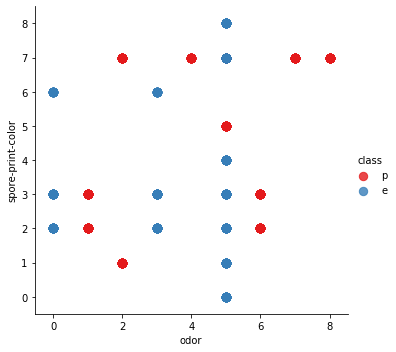

In [85]:
sns.lmplot('odor', 'spore-print-color', data=df, hue='class',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [71]:

w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (svm.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = svm.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svm.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

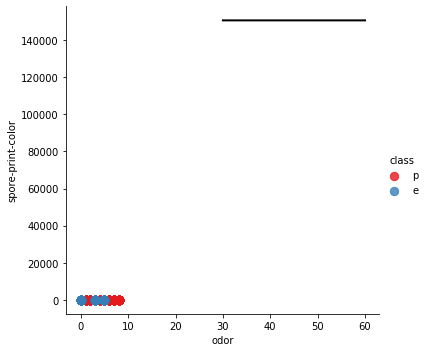

In [86]:
sns.lmplot('odor', 'spore-print-color', data=df, hue='class', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

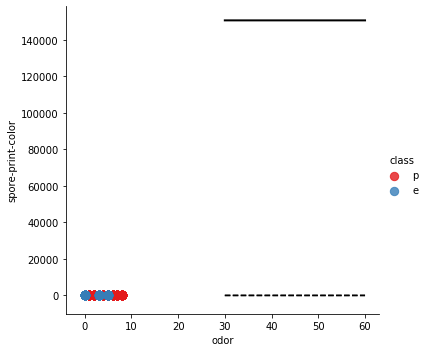

In [87]:
sns.lmplot('odor', 'spore-print-color', data=df, hue='class', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=80, facecolors='none');

In [88]:

clf_svm = SVC(kernel="rbf",gamma='auto', C=1.0) 
clf_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
train_score = str(clf_svm.score(X_train,y_train))
test_score = str(clf_svm.score(X_test, y_test))
print ("SVM Model Train Accuracy: " + train_score[:4])
print ("SVM Model Test Accuracy: " + test_score[:4])

SVM Model Train Accuracy: 1.0
SVM Model Test Accuracy: 1.0


In [94]:
clf_svm = SVC(kernel="poly",gamma='auto', C=1.0) 
clf_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
train_score = str(clf_svm.score(X_train,y_train))
test_score = str(clf_svm.score(X_test, y_test))
print ("SVM Model Train Accuracy: " + train_score[:4])
print ("SVM Model Test Accuracy: " + test_score[:4])

SVM Model Train Accuracy: 1.0
SVM Model Test Accuracy: 1.0
